In [82]:
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt

scores_file = 'data/athlete_events.csv'
noc_details_file = 'data/noc_regions.csv'


In [83]:
scores = pd.read_csv(scores_file)
scores

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [84]:
scores.shape

(271116, 15)

In [85]:
noc = pd.read_csv(noc_details_file)
noc

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN
...,...,...,...
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN


In [86]:
# Merge noc dataframe to scores dataframe (left join on NOC)
merged_data = pd.merge(scores, noc, on='NOC', how='left')
# Replace missing value on Medal variable to 'No_Medal'
merged_data.Medal = scores.Medal.fillna('No_Medal')
# Drop column 'notes','Games','City', 'Team' which we will not use on this analysis
merged_data = merged_data.drop(['notes', 'Games', 'Team'], axis=1)
merged_data.head()


,ID,Name,Sex,Age,Height,Weight,NOC,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No_Medal,China
1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No_Medal,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,No_Medal,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No_Medal,Netherlands


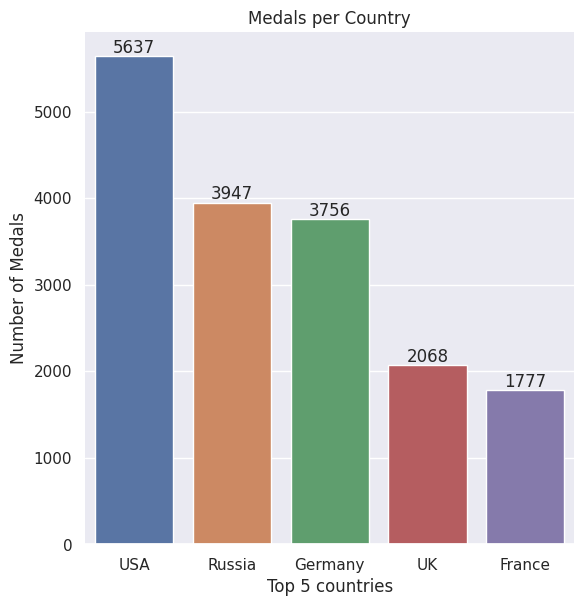

In [87]:
# Top 5 countries by total Medals
all_medals = merged_data[(merged_data.Medal != 'No_Medal')]
totalMedalsByCountry = all_medals.region.value_counts().reset_index(name='Medal').head(5)

# Visualize with seaborn
g = sb.catplot(x="index", y="Medal", data=totalMedalsByCountry,
                height=6, kind="bar", palette="deep")
g.despine(left=True)
g.set_xlabels("Top 5 countries")
g.set_ylabels("Number of Medals")
plt.title('Medals per Country')
ax = g.facet_axis(0, 0)
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

[Text(0, 0.5, 'Person')]

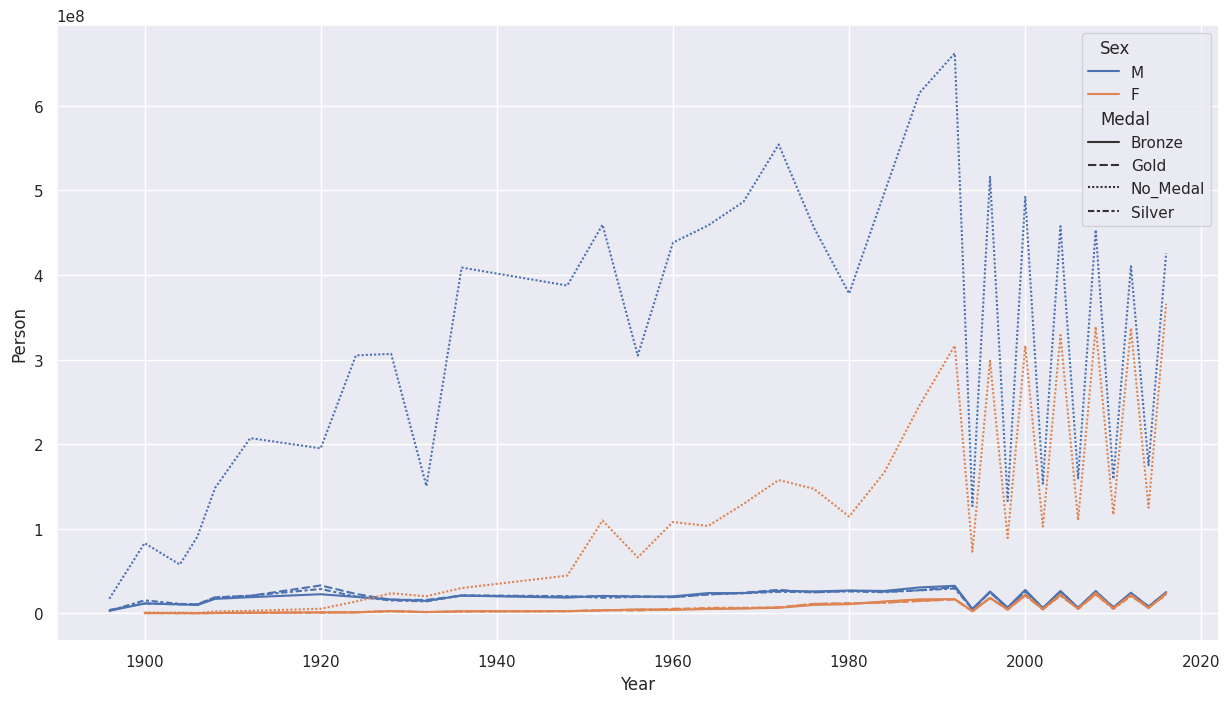

In [88]:
#ratio of male and female athletes participating in the olympics over the years
sb.set_theme(style="darkgrid")
sb.set(rc = {'figure.figsize':(15,8)})
dt = merged_data.groupby(['Year','Sex', 'Medal'], as_index=False).agg(total_persons=('ID', 'sum'))
ax = sb.lineplot(x="Year", y="total_persons", hue="Sex", style= 'Medal', data=dt)
ax.set(ylabel='Person')

In [89]:
#
most_medal_sports_insight = all_medals.groupby(["Sport"]).agg(
    total_Medal=('Medal','count'), last_time_held=('Year','max'), first_time_held=('Year','min'), total_times_of_held=('Year','nunique')).sort_values("total_Medal", ascending=False).reset_index().head(10)
most_medal_sports_insight

,Sport,total_Medal,last_time_held,first_time_held,total_times_of_held
0,Athletics,3969,2016,1896,29
1,Swimming,3048,2016,1896,29
2,Rowing,2945,2016,1900,28
3,Gymnastics,2256,2016,1896,29
4,Fencing,1743,2016,1896,29
5,Football,1571,2016,1900,27
6,Ice Hockey,1530,2014,1920,23
7,Hockey,1528,2016,1908,23
8,Wrestling,1296,2016,1896,28
9,Cycling,1263,2016,1896,29


In [90]:
# view more about last year a sport was held
least_medal_sports_insight = all_medals.groupby(["Sport"]).agg(
    total_Medal=('Medal','count'), last_time_held=('Year','max'), total_times_of_held=('Year','nunique')).sort_values("total_Medal", ascending=True).reset_index().head(10)
least_medal_sports_insight

,Sport,total_Medal,last_time_held,total_times_of_held
0,Aeronautics,1,1936,1
1,Basque Pelota,2,1900,1
2,Jeu De Paume,3,1908,1
3,Roque,3,1904,1
4,Motorboating,7,1908,1
5,Croquet,8,1900,1
6,Racquets,10,1908,1
7,Military Ski Patrol,12,1924,1
8,Cricket,24,1900,1
9,Alpinism,25,1936,3


In [91]:
#view more about average of age on sports which have the most medal
most_medal_sports_w_age = all_medals.groupby(["Sport", "Sex"]).agg\
    (total_medal=('Medal', 'count'), average_age=("Age", 'mean'), max_age=("Age", 'max'), min_age=("Age", 'min')).sort_values("total_medal", ascending=False).head(10).reset_index()
most_medal_sports_w_age

,Sport,Sex,total_medal,average_age,max_age,min_age
0,Athletics,M,2694,24.968925,48.0,16.0
1,Rowing,M,2225,25.503318,58.0,12.0
2,Swimming,M,1674,21.798670,46.0,14.0
3,Gymnastics,M,1555,24.900134,45.0,10.0
4,Fencing,M,1394,29.577681,52.0,16.0
5,Swimming,F,1374,19.868900,41.0,12.0
6,Athletics,F,1275,25.128728,40.0,15.0
7,Football,M,1269,23.763222,35.0,15.0
8,Ice Hockey,M,1230,26.132520,43.0,16.0
9,Wrestling,M,1228,26.085213,41.0,17.0


In [92]:
for_performance_on_age_analysis = all_medals.dropna()
#Youngest/oldest athlete ever to win an Olympic medal.
for_performance_on_age_analysis[(for_performance_on_age_analysis.Age == 13) | (for_performance_on_age_analysis.Age == 66)]

,ID,Name,Sex,Age,Height,Weight,NOC,Year,Season,City,Sport,Event,Medal,region
44972,23192,Robin Marie Corsiglia (-Scholefield),F,13.0,157.0,45.0,CAN,1976,Summer,Montreal,Swimming,Swimming Women's 4 x 100 metres Medley Relay,Bronze,Canada
52010,26731,Donna Elizabeth de Varona (-Pinto),F,13.0,168.0,61.0,USA,1960,Summer,Roma,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,Gold,USA
63524,32552,"Kornelia Ender (-Matthes, -Grummt)",F,13.0,172.0,59.0,GDR,1972,Summer,Munich,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,Silver,Germany
63525,32552,"Kornelia Ender (-Matthes, -Grummt)",F,13.0,172.0,59.0,GDR,1972,Summer,Munich,Swimming,Swimming Women's 200 metres Individual Medley,Silver,Germany
63526,32552,"Kornelia Ender (-Matthes, -Grummt)",F,13.0,172.0,59.0,GDR,1972,Summer,Munich,Swimming,Swimming Women's 4 x 100 metres Medley Relay,Silver,Germany
73581,37398,Fu Mingxia,F,13.0,160.0,48.0,CHN,1992,Summer,Barcelona,Diving,Diving Women's Platform,Gold,China
80827,41040,Gina Elena Gogean (-Groza),F,13.0,150.0,40.0,ROU,1992,Summer,Barcelona,Gymnastics,Gymnastics Women's Team All-Around,Silver,Romania
119277,60384,Kim Yun-Mi,F,13.0,160.0,48.0,KOR,1994,Winter,Lillehammer,Short Track Speed Skating,"Short Track Speed Skating Women's 3,000 metres...",Gold,South Korea
170652,85771,Nian Yun,F,13.0,168.0,61.0,CHN,1996,Summer,Atlanta,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,Silver,China
173379,87135,Louis Noverraz,M,66.0,179.0,78.0,SUI,1968,Summer,Mexico City,Sailing,Sailing Mixed 5.5 metres,Silver,Switzerland


In [93]:
# Top 10 athletes with the most medals in history.
top_ten_athletes = all_medals.groupby('ID').agg({"Name": np.max, "Sport": np.max, "Medal": np.count_nonzero,
                              "Year": np.max, "region": np.max}).sort_values("Medal", ascending=False).head(10).reset_index()

top_ten_athletes

,ID,Name,Sport,Medal,Year,region
0,94406,"Michael Fred Phelps, II",Swimming,28,2016,USA
1,67046,Larysa Semenivna Latynina (Diriy-),Gymnastics,18,1964,Russia
2,4198,Nikolay Yefimovich Andrianov,Gymnastics,15,1980,Russia
3,11951,Ole Einar Bjrndalen,Biathlon,13,2014,Norway
4,109161,Borys Anfiyanovych Shakhlin,Gymnastics,13,1964,Russia
5,89187,Takashi Ono,Gymnastics,13,1964,Japan
6,74420,Edoardo Mangiarotti,Fencing,13,1960,Italy
7,85286,Aleksey Yuryevich Nemov,Gymnastics,12,2000,Russia
8,35550,Birgit Fischer-Schmidt,Canoeing,12,2004,Germany
9,119922,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",Swimming,12,2004,USA


/tmp/ipykernel_14398/3929917343.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  top_ten_athletes_details=top_ten_athletes_details.pivot('Name','Medal','ID')


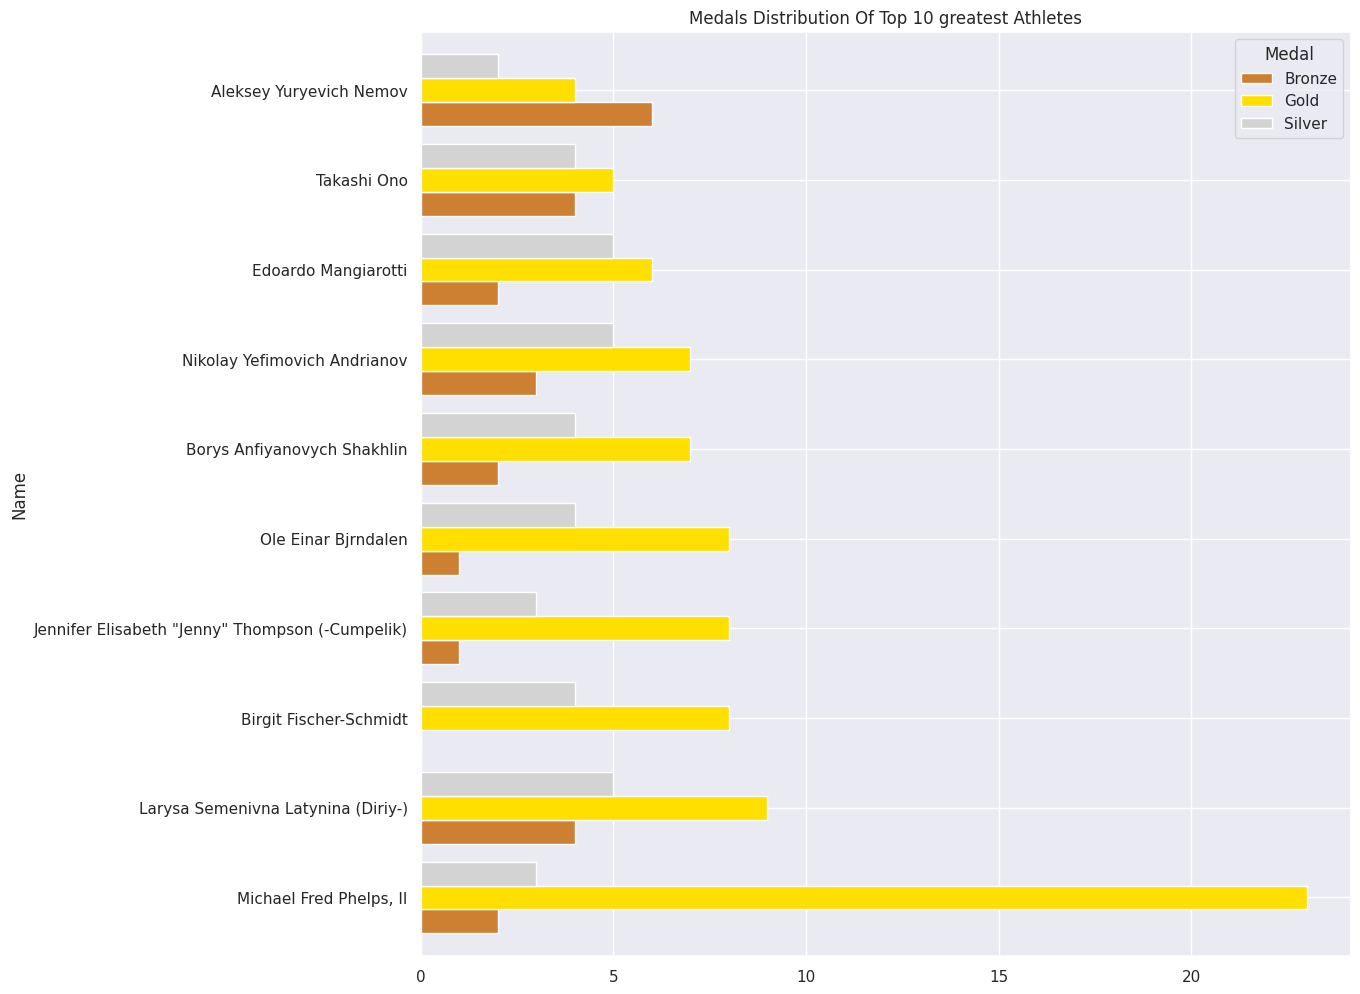

In [94]:
# Medals Distribution Of Top 10 greatest Athletes.
top_ten_athletes_details = all_medals[all_medals.ID.isin(top_ten_athletes.ID)].groupby(['Name','Medal'])['ID'].count().reset_index()
top_ten_athletes_details=top_ten_athletes_details.pivot('Name','Medal','ID')
top = top_ten_athletes_details.sort_values("Gold", ascending=False)
top.plot.barh(width=0.8,color=['#CD7F32','#FFDF00','#D3D3D3'])
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.title('Medals Distribution Of Top 10 greatest Athletes')
plt.show()

/tmp/ipykernel_14398/3618848652.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  top = top_countries_on_top_sport.pivot('Sport', 'region', 'Medals Count')


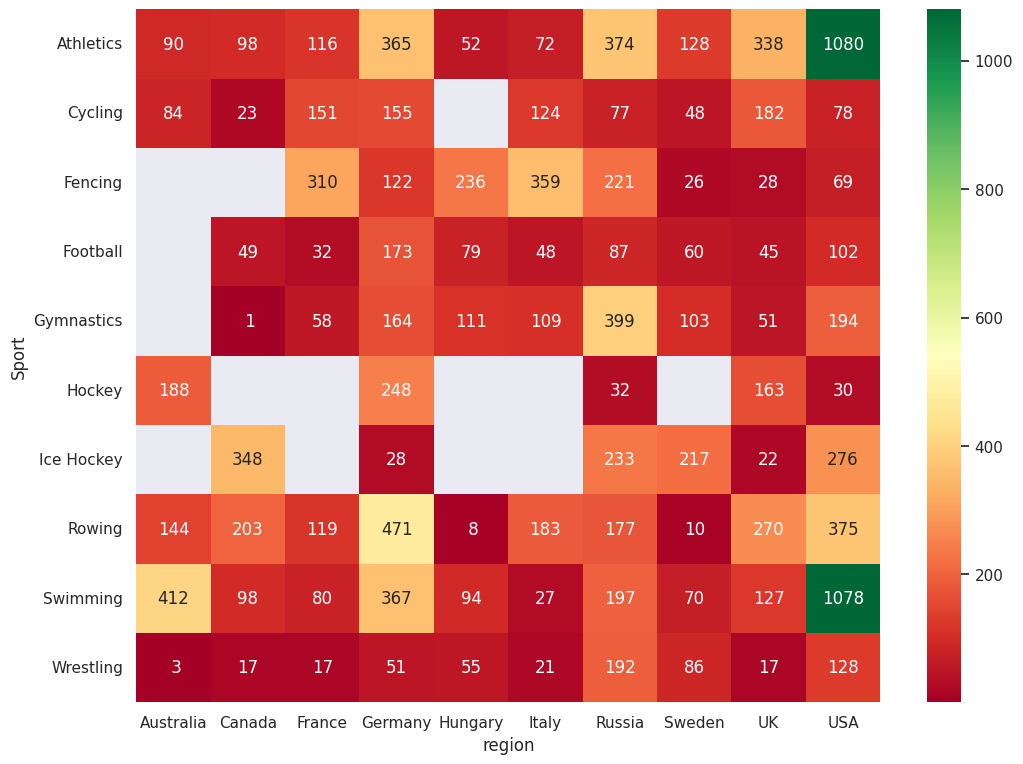

In [95]:
# The strengths of each of the above sport according to the top 10 countries with the most medals
top_country_by_medal = all_medals.groupby('region').size().reset_index(
    name="Count").sort_values("Count", ascending=False).head(10)

top_countries_on_top_sport = all_medals[all_medals.Sport.isin(most_medal_sports_insight.Sport.head(
    10))].groupby(['Sport', 'region']).size().reset_index(name='Medals Count')
top_countries_on_top_sport = top_countries_on_top_sport[top_countries_on_top_sport.region.isin(
    top_country_by_medal.region)]
top = top_countries_on_top_sport.pivot('Sport', 'region', 'Medals Count')
sb.heatmap(top, cmap='RdYlGn', annot=True, fmt='2.0f')
fig = plt.gcf()
fig.set_size_inches(12, 9)
plt.show()

In [96]:
#scores by athlete with age from 18 to 25
medal_by_18to25yo = all_medals.dropna()[(all_medals.Age >=18) & (all_medals.Age <=25)]
medal_by_18to25yo.describe()

/tmp/ipykernel_14398/335792912.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  medal_by_18to25yo = all_medals.dropna()[(all_medals.Age >=18) & (all_medals.Age <=25)]


,ID,Age,Height,Weight,Year
count,15853.000000,15853.000000,15853.000000,15853.000000,15853.000000
mean,70418.839147,22.303980,177.483694,72.870655,1985.843310
std,38952.529791,1.989502,10.854813,14.287248,23.392474
min,20.000000,18.000000,136.000000,30.000000,1896.000000
25%,37780.000000,21.000000,170.000000,63.000000,1972.000000
50%,69644.000000,23.000000,178.000000,72.000000,1988.000000
75%,104754.000000,24.000000,185.000000,82.000000,2004.000000
max,135563.000000,25.000000,223.000000,182.000000,2016.000000


In [97]:
#scores by athlete with age from remain age group
medal_by_out_of_18to25yo = all_medals.dropna()[(all_medals.Age <18) | (all_medals.Age >25)]
medal_by_out_of_18to25yo.describe()

/tmp/ipykernel_14398/3174457287.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  medal_by_out_of_18to25yo = all_medals.dropna()[(all_medals.Age <18) | (all_medals.Age >25)]


,ID,Age,Height,Weight,Year
count,14319.000000,14319.000000,14319.000000,14319.000000,14319.000000
mean,70005.878204,28.888400,177.826105,74.738669,1990.389413
std,38714.001126,5.155317,10.994688,15.704545,21.699423
min,16.000000,13.000000,136.000000,28.000000,1896.000000
25%,37189.000000,27.000000,170.000000,64.000000,1976.000000
50%,69865.000000,28.000000,178.000000,73.000000,1996.000000
75%,103725.000000,31.000000,185.000000,85.000000,2008.000000
max,135554.000000,66.000000,223.000000,170.000000,2016.000000


In [98]:
def bmi_calculate(height,weight):
        bmi = weight/((height/100)**2)
        return bmi

def bmi_classify(bmi):
        if (bmi < 18.5):
            return "Underweight"
        elif (bmi >= 18.5 and bmi < 24.9):
            return "Healthy"
        elif (bmi >= 24.9 and bmi < 30):
            return "Overweight"
        elif (bmi >= 30):
            return "Suffering from Obesity"
            
def medal_classify(medal):
        if (medal == 'No_Medal'):
            return "No_Medal"
        else:
            return "Have Medal"


In [99]:
#bmi calculate and classify
bmi_insight_df = merged_data[merged_data.Age >= 20]
bmi_insight_df['BMI'] = bmi_insight_df.apply(lambda x: bmi_calculate(x.Height, x.Weight), axis=1)
bmi_insight_df['BMI_Classification'] = bmi_insight_df.apply(lambda x: bmi_classify(x.BMI), axis=1)
bmi_insight_df['Medal_Classification'] = bmi_insight_df.apply(lambda x: medal_classify(x.Medal), axis=1)

/tmp/ipykernel_14398/1299922652.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bmi_insight_df['BMI'] = bmi_insight_df.apply(lambda x: bmi_calculate(x.Height, x.Weight), axis=1)
/tmp/ipykernel_14398/1299922652.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bmi_insight_df['BMI_Classification'] = bmi_insight_df.apply(lambda x: bmi_classify(x.BMI), axis=1)
/tmp/ipykernel_14398/1299922652.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

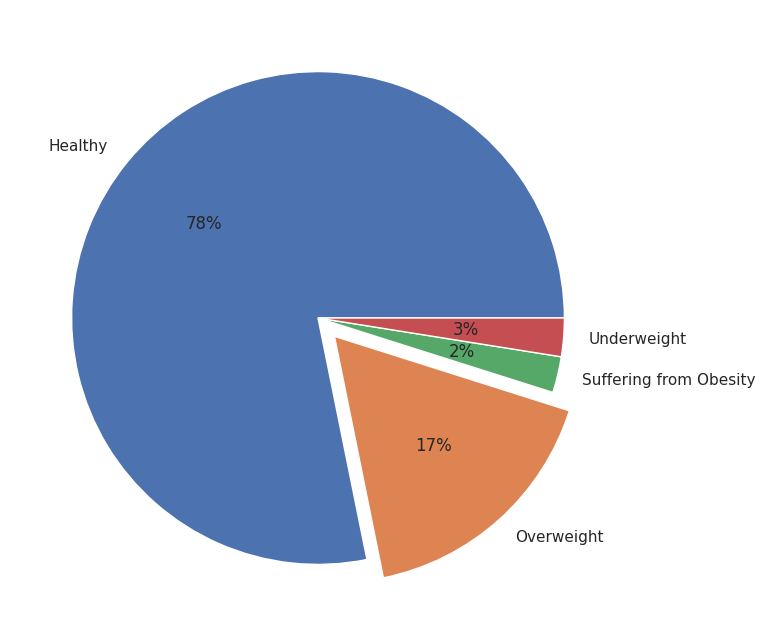

In [100]:
# over view rate of BMI index 
bmi_data = bmi_insight_df.groupby(["BMI_Classification"]).agg(total_person=('ID', 'count')).reset_index()
explode = [0, 0.1, 0, 0]
palette_color = sb.color_palette('deep')
plt.pie(bmi_data.total_person, labels=bmi_data.BMI_Classification, colors=palette_color,
        explode=explode, autopct='%.0f%%')
plt.show()

In [101]:
count_by_bmi_medal = bmi_insight_df.groupby(['BMI_Classification','Medal_Classification']).agg(count=('ID','count')).reset_index()
count_by_bmi_medal


,BMI_Classification,Medal_Classification,count
0,Healthy,Have Medal,20623
1,Healthy,No_Medal,120233
2,Overweight,Have Medal,5753
3,Overweight,No_Medal,24754
4,Suffering from Obesity,Have Medal,678
5,Suffering from Obesity,No_Medal,3588
6,Underweight,Have Medal,557
7,Underweight,No_Medal,3978


In [102]:
count_by_bmi_medal_transpose = count_by_bmi_medal.pivot(index='BMI_Classification', columns='Medal_Classification', values='count')
count_by_bmi_medal_transpose


Medal_Classification,Have Medal,No_Medal
BMI_Classification,,
Healthy,20623,120233
Overweight,5753,24754
Suffering from Obesity,678,3588
Underweight,557,3978


In [103]:
count_by_bmi_medal_transpose['sum_medal'] = (count_by_bmi_medal_transpose['Have Medal'] + count_by_bmi_medal_transpose['No_Medal'])
count_by_bmi_medal_transpose['percent Have Medal'] = (round(100* count_by_bmi_medal_transpose['Have Medal'] / count_by_bmi_medal_transpose['sum_medal'],2))
count_by_bmi_medal_transpose['percent No Medal'] = (round(100* count_by_bmi_medal_transpose['No_Medal'] / count_by_bmi_medal_transpose['sum_medal'],2))
count_by_bmi_medal_transpose

Medal_Classification,Have Medal,No_Medal,sum_medal,percent Have Medal,percent No Medal
BMI_Classification,,,,,
Healthy,20623,120233,140856,14.64,85.36
Overweight,5753,24754,30507,18.86,81.14
Suffering from Obesity,678,3588,4266,15.89,84.11
Underweight,557,3978,4535,12.28,87.72


<BarContainer object of 4 artists>
<BarContainer object of 4 artists>


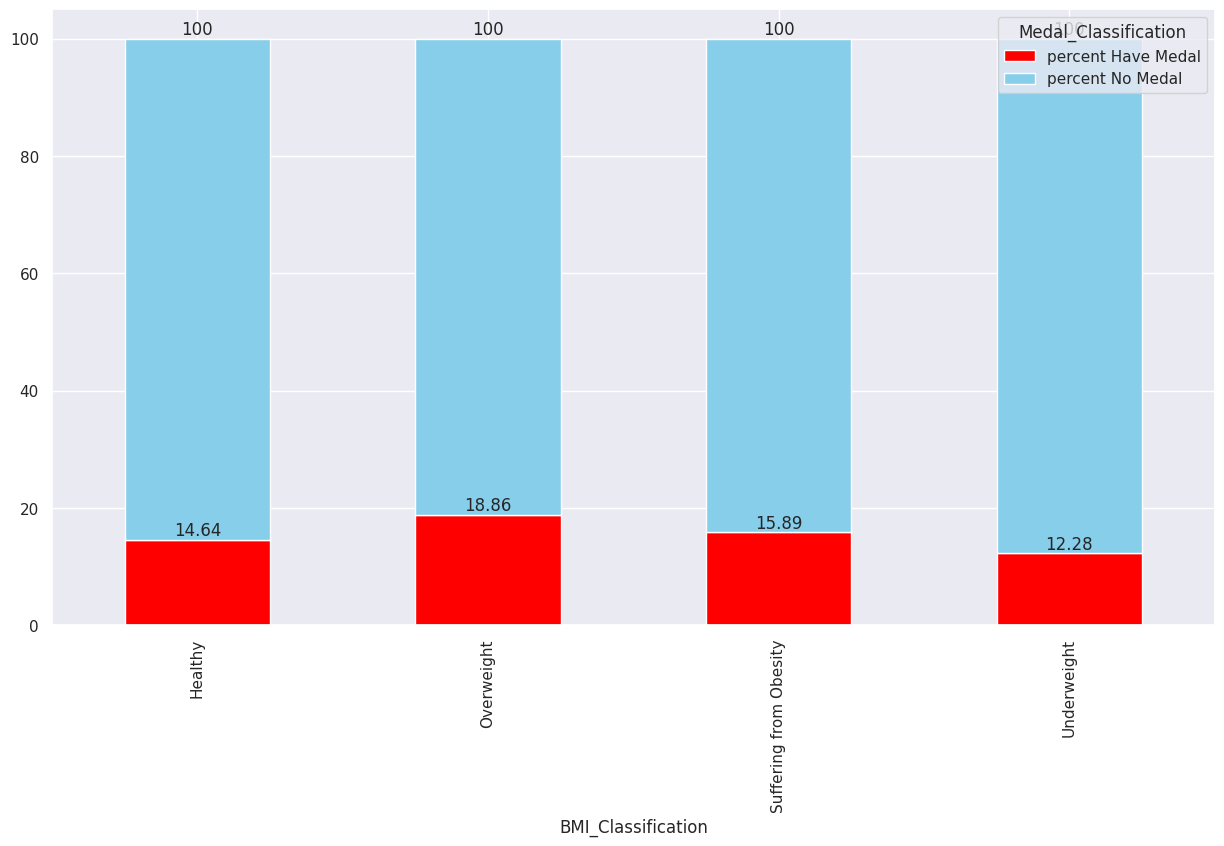

In [104]:
df_for_visualize  = count_by_bmi_medal_transpose.drop(['Have Medal','No_Medal','sum_medal'], axis=1)
ax = df_for_visualize.plot(kind='bar', stacked=True, color=['red', 'skyblue'])
for container in ax.containers:
    print(container)
    ax.bar_label(container)